In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

In [2]:
ad_data = pd.read_csv(r'C:\Users\Admin\Desktop\project\BA\week 1\Advertising.csv')

In [2]:
ad_data =  pd.read_csv("store2.csv")

In [3]:
ad_data = ad_data[['Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']]

In [4]:
ad_data

,Product Name,Sales,Quantity,Discount,Profit
0,Acme Titanium Bonded Scissors,25.500,3,0.0,6.6300
1,Hoover Commercial Lightweight Upright Vacuum,1.392,2,0.8,-3.7584
2,Acco Hanging Data Binders,2.286,2,0.7,-1.6764
3,Wilson Jones Active Use Binders,4.368,2,0.7,-3.0576
4,Acco Expandable Hanging Binders,5.742,3,0.7,-4.5936
...,...,...,...,...,...
9689,50 Colored Long Pencils,50.800,5,0.0,13.2080
9690,Newell 351,10.496,4,0.2,1.1808
9691,GBC Standard Therm-A-Bind Covers,44.856,6,0.7,-35.8848
9692,Imation 16GB Mini TravelDrive USB 2.0 Flash Drive,185.528,7,0.2,48.7011


In [9]:
# ad_data = ad_data[['Name', 'age', 'mobile no', 'city', 'marks', 'salary']]

In [5]:
print(ad_data.head())
# ad_data.info()

                                   Product Name   Sales  Quantity  Discount  \
0                 Acme Titanium Bonded Scissors  25.500         3       0.0   
1  Hoover Commercial Lightweight Upright Vacuum   1.392         2       0.8   
2                     Acco Hanging Data Binders   2.286         2       0.7   
3               Wilson Jones Active Use Binders   4.368         2       0.7   
4               Acco Expandable Hanging Binders   5.742         3       0.7   

   Profit  
0  6.6300  
1 -3.7584  
2 -1.6764  
3 -3.0576  
4 -4.5936  


In [6]:
ad_data.describe()

,Sales,Quantity,Discount,Profit
count,9694.000000,9694.000000,9694.000000,9694.000000
mean,234.418182,3.790902,0.155167,29.178642
std,631.789011,2.227335,0.204867,237.716782
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.480000,2.000000,0.000000,1.735200
50%,55.928000,3.000000,0.200000,8.730750
75%,214.850000,5.000000,0.200000,30.009300
max,22638.480000,14.000000,0.800000,8399.976000


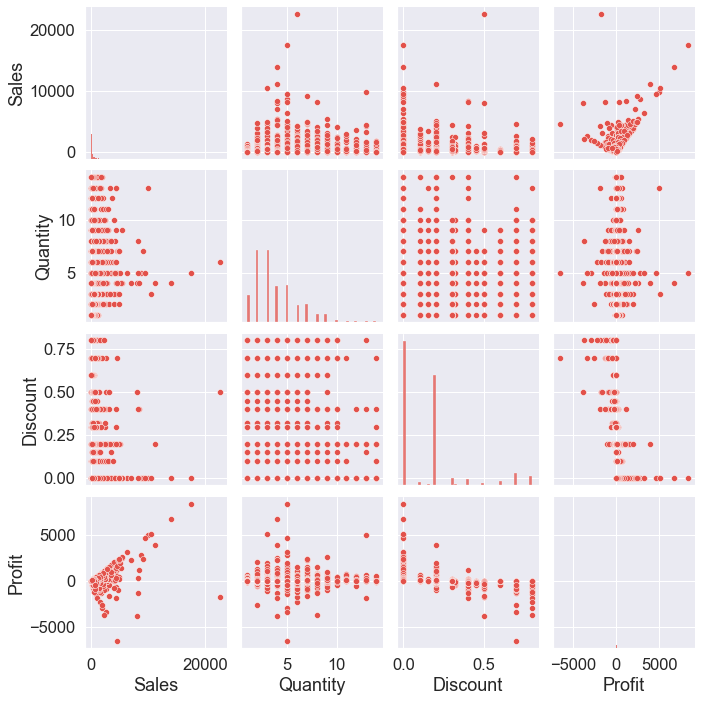

In [7]:
p = sns.pairplot(ad_data)

# Assumptions for Linear Regression
1. Linearity
Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a pair plot to check the relation of independent variables with the Sales variable


In [8]:
# visualize the relationship between the features and the response using scatterplots
# p = sns.pairplot(ad_data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7)

# By looking at the plots we can see that with the Sales variable the none of the independent variables form an accurately linear shape but TV and Radio do still better than Newspaper which seems to hardly have any specific shape

In [15]:
# Fitting the linear model

# x = ad_data.drop(["mp"],axis=1)
# y = ad_data.Salary

x = ad_data[['Quantity', 'Discount', 'Profit']]
y = ad_data.Sales

In [16]:
ad_data.columns

Index(['Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [20]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X,y)
y_pred = regr.predict(X)
print(X[1:10])

regr.intercpt
regr.coeff_

[[-0.80409743  3.14772475 -0.13856296]
 [-0.80409743  2.65957893 -0.12980419]
 [-0.80409743  2.65957893 -0.13561476]
 [-0.35510714  2.65957893 -0.14207657]
 [ 0.09388316  0.21884986 -0.12014682]
 [ 0.09388316  0.21884986 -0.10700109]
 [-0.35510714  0.21884986 -0.11897814]
 [-0.80409743  2.65957893 -0.17307303]
 [ 0.09388316  0.21884986 -0.09844929]]


AttributeError: 'LinearRegression' object has no attribute 'intercpt'

In [21]:
print("R squared: {}".format(r2_score(y_true=y,y_pred=y_pred)))

R squared: 0.26482882054499157


# 2. Mean of Residuals
Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out.

In [22]:
residuals = y.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 4.878659427707063e-15


#  Very close to zero so all good here

#3. Check for Homoscedasticity 

# Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.
Detecting heteroscedasticity!
Graphical Method: Firstly do the regression analysis and then plot the error terms against the predicted values( Yi^). If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present.

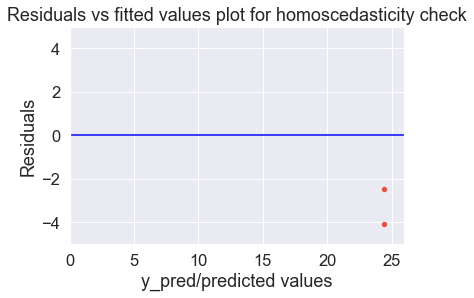

In [23]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-5,5)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

#  Check for Normality of error terms/residuals

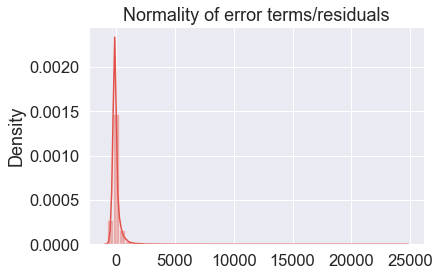

In [24]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

# No perfect multicollinearity 

#  In regression, multicollinearity refers to the extent to which independent variables are correlated. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity

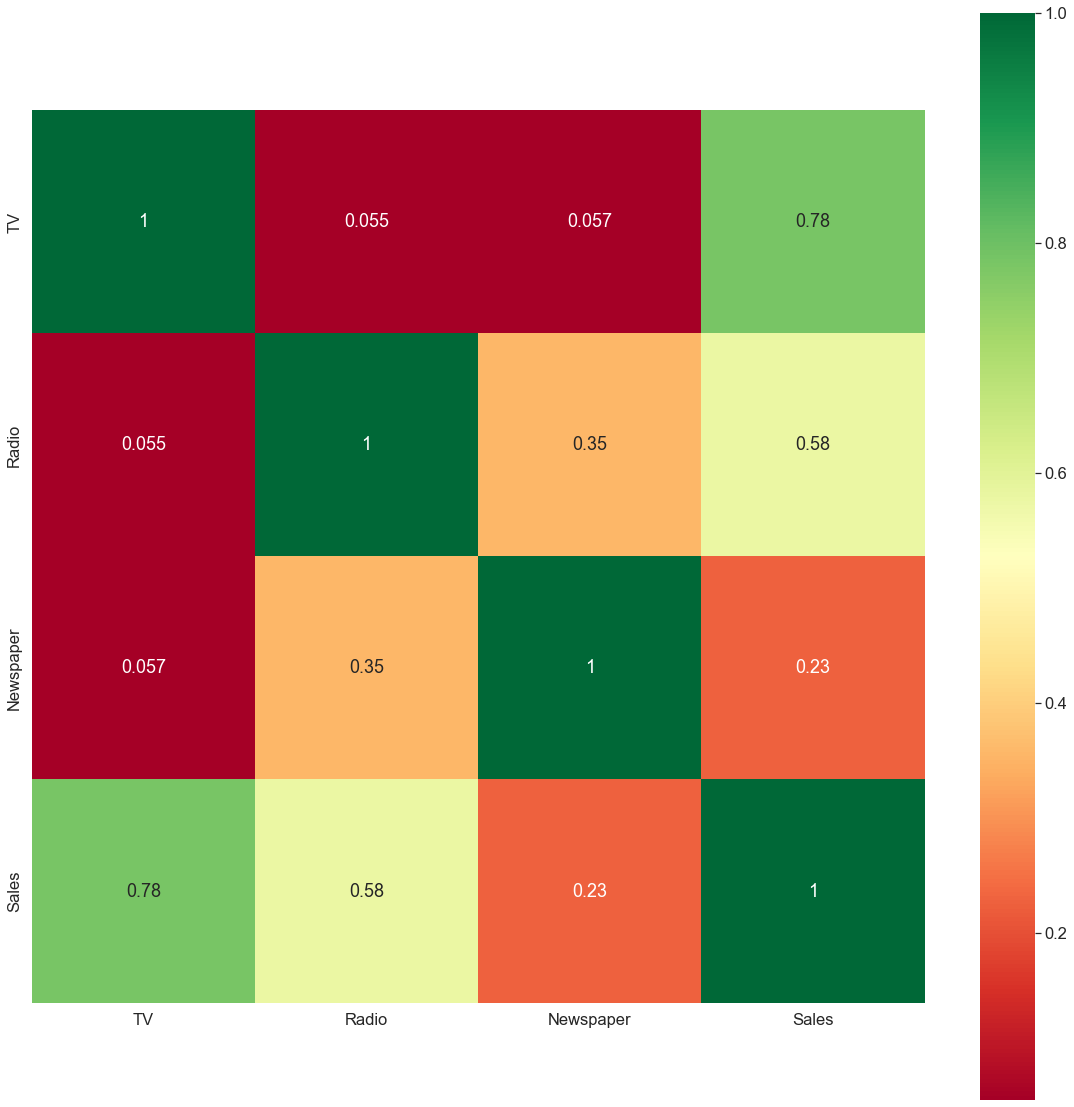

In [21]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(ad_data.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

#  Look for correlation of rows where the dependent variable (Sales in this case) is not involved because if a variable is correlated with the dependent variable then this would be a good sign for our model. Correlation within dependent variables is what we need to look for and avoid. This data doesn't contain perfect multicollinearity among independent variables. In case there was any then we would try to remove one of the correlated variables depending on which was more important to our regression model

In [10]:
# MLR for different data


import statsmodels.api as sm
import statsmodels.formula.api as smf
auto_filepath = "Auto.csv"
Auto = pd.read_csv(auto_filepath, na_values = ["?"]).dropna()
mod = smf.ols(formula = "mpg ~ horsepower", data = Auto)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           7.03e-81
Time:                        13:39:19   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

In [11]:
import pandas as pd

In [11]:
data = Auto.copy()

In [4]:
data
dep - mpg
ind - cylinder , dp , hp , weight , accelation

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [12]:
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [ ]:
muli-collinearity  -> displacement , weight -> -80 %
                      cyliner , displacement -> 80%
                      hp , cyliner

In [15]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [ ]:
dep - mpg
ind -> case1 ->  cyliner , weight , accelaration   -  R - 70 %
                
            
       case2 ->  hp , displacement , weight , accelation
       case3 ->  weight , accelation , dispalcement

In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
mod = smf.ols(formula = "mpg ~  weight +acceleration + displacement", data = Auto)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     304.3
Date:                Thu, 01 Jun 2023   Prob (F-statistic):          1.56e-101
Time:                        10:42:39   Log-Likelihood:                -1124.1
No. Observations:                 392   AIC:                             2256.
Df Residuals:                     388   BIC:                             2272.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       41.0032      1.865     21.986   

In [ ]:
y_pred = lasso.predict(X_test)